# Data Science Project: Planning Stage - Individual!
**Name:** Robbie Suganob. <br>
**Student Number:** 18247866. <br>
**Section:** 100-002.

In [67]:
library(repr)
library(tidyverse)

### 1 - Data description:

**Players** dataset:
<br> - Number of observations: 196 (indicates 196 different users/players).
<br> - Number of variables: 7.

Descriptive summary of the variables in the **players** dataset: <br>

| Variable | Type | Description |
| --- | --- | --- | 
| `experience`| categorical (chr) | Refers to the player's experience level (amateur, regular, veteran, pro). |
| `subscribe` | logical (lgl) | Whether the player is a subscriber to the game-related newsletter. |
| `hashedEmail` | categorical (chr) | A hashed (encrypted) version of a player's email that acts as an anonymized identifier for the player; this is done to avoid using their actual email addresses and thus protect their privacy. |
| `played_hours` | numerical (dbl) | Total hours played by the player. |
| `name` | categorical (chr) | Player's name. |
| `gender` | categorical (chr) | Gender of the player. | 
| `Age` | numerical (dbl) | Player's age. |


Other notes for the **players** dataset:
<br> - Some variables such as `gender` and `experience` may not be evenly distributed, which may introduce biases to predictions.
<br> - `played_hours` could have outliers; some players are observed to have extreme values. This could potentially skew the averages and impact the modeling.
<br> - We would need to join the `hashedEmail` variable with the **sessions** dataset in order to analyze session behaviour per player.

<hr> 

**Sessions** dataset:
<br> - Number of observations: 1535 (indicates 1535 recorded sessions).
<br> - Number of variables: 5.

Descriptive summary of the variables in the **sessions** dataset: <br>

| Variable | Type | Description |
| --- | --- | --- | 
| `hashedEmail`| categorical (chr) | Anonymized player identifier, matches the **players** dataset. |
| `start_time` | categorical (chr) | Date and time for the start of player's session. |
| `end_time` | categorical (chr) | Date and time for the end of player's session. |
| `original_start_time` | numerical (dbl) | A timestamp version of `start_time`. |
| `original_end_time` | numerical (dbl) | A timestamp version of `end_time`. |

Other notes for the **sessions** dataset:
<br> - `start_time` and `end_time` should be converted to datetime (POSIXct) for the sake of sorting and calculations.
<br> - We should compute the session lengths (start_time - end_time).
<br> - We need to aggregate the data for multiple sessions for the same player. There are significantly more session observations than player observations, indicating that each player has multiple sessions. We would need to group them by `hashedEmail`. 

### 2 - Questions:

**Broad question**: Question 2 - We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific question**: Can certain experience levels, ages, and genders predict the total number of hours a player contributes to the **players** dataset?

**Explanation**:
<br>Here, the response variable would be `played_hours` from the **players** dataset. To determine this, the chosen explanatory variables will help explain how these specific factors may influence how many hours a player would contribute to the dataset, thereby answering the broader question of what "kinds" of players are more likely to contribute a larger amount of data. With this, the specific question is a more focused interpretation of the broader question. 

In terms of data wrangling, we would need to match the **players** and **sessions** dataset using `hashedEmail`, which exists in both datasets. We would then need to aggregate the total number of sessions per player in a new variable (`total_sessions`), and also calculate the average session duration per player. Using the `mutate` function, we can create a new variable: `avg_session_length`, which would be computed by `played_hours / total_sessions`. We can then compare the `played_hours` and `avg_session_length` variables against `experience`, `age`, and `gender` to determine which characteristics are the strongest predictors of the amount of data a player contributes.

### 3 - Exploratory data analysis and visualization:

Reading the **players** dataset:

In [20]:
players <- read_csv("dsproject-individual/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Reading the **sessions** dataset:

In [19]:
sessions <- read_csv("dsproject-individual/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Minimum wrangling of **players** dataset:
<br> - The data is mostly tidy, but I have opted to arrange the `experience` column by experience level for the sake of organization. 

In [78]:
tidy_players <- players |>
    mutate(experience = factor(experience, levels = c("Amateur", "Beginner", "Regular", "Veteran", "Pro"))) |>
    arrange(experience)

head(tidy_players)
tail(tidy_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f4f29f2465743ead8c3ce02fc84542afe33ae3c95ef56a42b8f7785550fe9e4a,0.6,Arlo,Male,19
Pro,FALSE,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.4,Lyra,Male,21
Pro,FALSE,e1e5b1d36ab7680b6927fd3cb619c2b5373167750f90f7a21bf67b5d9b0fd73f,0.0,Jesse,Non-binary,17
Pro,FALSE,f7875ae87a61632030d5c4029ee8cf081be7047b2b4a9c04ab5a706f59786197,0.2,Liam,Male,17
Pro,FALSE,d46bd29a2ed08e3500bd8729085ef4b6f0ca65baf4c756f88b6bedf7a18e0352,1.7,Asher,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Minimum wrangling of **sessions** dataset:
<br> - Again, the data is mostly tidy for the sake of this project. Although there are multiple repetitions in the `hashedEmail` column, each row represents a different observation (unique session). I removed the `original_start_time` and `original_end_time` columns as they are redundant; we only need `start_time` and `end_time` to calculate the total session time. I have also converted it to POSIXct format (dttm) from character format to make calculations easier.

In [46]:
tidy_sessions <- sessions |>
    select(-original_start_time, -original_end_time) |>
    mutate(start_time = as.POSIXct(start_time, format="%d/%m/%Y %H:%M", tz="PTC")) |>
    mutate(end_time = as.POSIXct(end_time, format="%d/%m/%Y %H:%M", tz="PTC"))

head(tidy_sessions)

hashedEmail,start_time,end_time
<chr>,<dttm>,<dttm>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00


Mean value for each quantitative variable in the **players.csv** dataset:

In [48]:
players_means <- players |>
    summarise(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))

players_means

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


Table format:

| Mean Played Hours | Mean Age |
| --- | --- |
| 5.84918 | 20.52062 |

Exploratory visualization of the **players** dataset:
<br> - This scatterplot compares `Age` against `played_hours` across different experience levels. The graphs are logarithmically scaled to account for outliers, as there are a select few observations with extremely high numbers of hours played. Additionally, to account for observations with 0 hours played (which would be ignored by the log10 scale), I added 0.1 to all values. This visualizaton offers multiple key insights For instance, the **pro** experience level has a more balanced ratio of low-hour to high-hour players compared to the others. Meanwhile, **amateur**, **regular**, and **veteran** players tend to cluster around lower playtimes. These patterns could be useful for deeper analysis when answering the research question.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


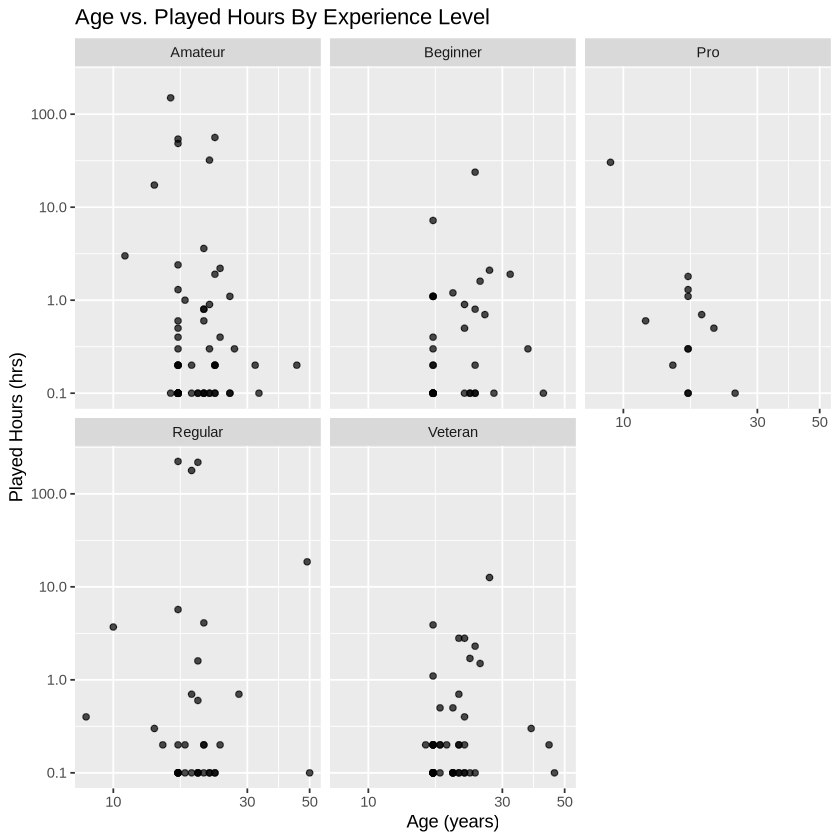

In [66]:
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours + 0.1)) +
    geom_point(alpha = 0.7) +
    labs(title = "Age vs. Played Hours By Experience Level", x = "Age (years)", y = "Played Hours (hrs)") +
    facet_wrap(~ experience) +
    scale_x_log10() +
    scale_y_log10()
    
players_plot

Exploratory visualization of the **sessions** dataset:
<br> - In terms of exploratory visualization, not much can be done with the **sessions** dataset. Comparisons between start times and end times would not contribute much to our question. To make full use of the sessions dataset would require combining it with the **players** dataset, which would be completed in a later stage of the project. However, one key observation we can make is the distribution of session duration, visualized through a histogram. We can observe that there are a substantial amount of players with lower session duration (> 100 minutes), which prompts us to explore the characteristics of the players with higher session durations. Again, these are only general trends which would require deeper analysis later on.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


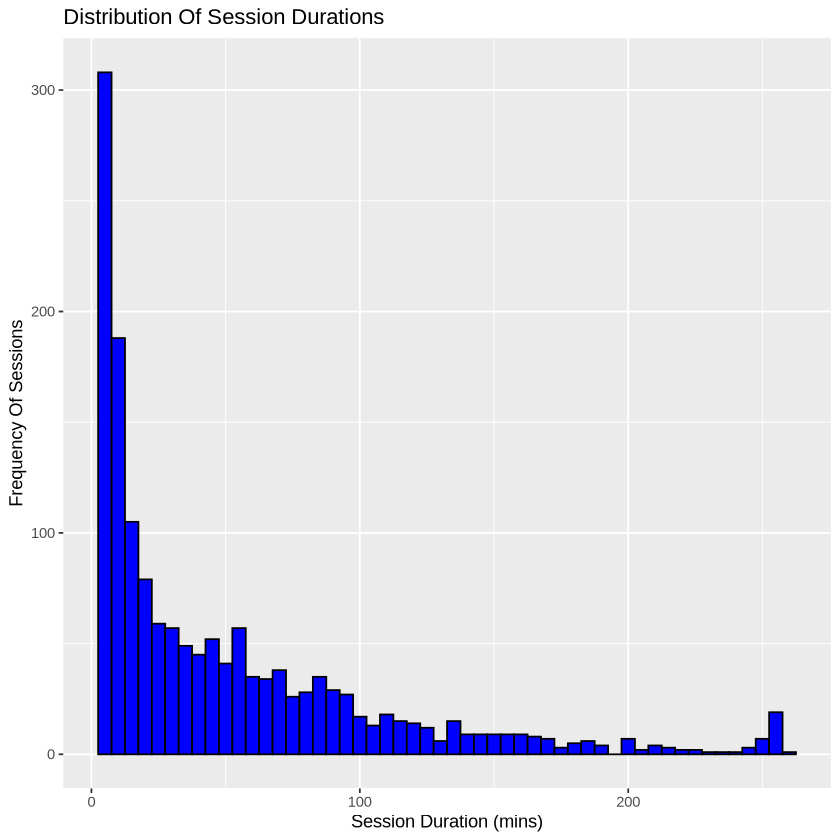

In [77]:
sessions_diff <- tidy_sessions |> 
    mutate(session_duration = as.numeric(difftime(end_time, start_time, units = "mins")))

sessions_plot <- sessions_diff |>
    ggplot(aes(x = session_duration)) + 
    geom_histogram(binwidth = 5, fill = "blue", color = "black") + 
    labs(title = "Distribution Of Session Durations", x = "Session Duration (mins)", y = "Frequency Of Sessions")

sessions_plot

### 4 - Methods and Plan:

To address the question of whether experience levels, ages, or genders can predict the total number of hours a player contributes to the data, I would utilise **linear regression** as my primary method. This method is appropriate as it is well-suited for understanding the relationships between multiple predictors and a continuous dependent variable (total hours played). This method is also useful due to its simplicity, as it provides a straightforward, explainable model that can easily be adjusted. In terms of assumptions, we assume that the relationship between the predictors and total hours played is approximately linear. Furthermore, we assume that each observation (player) is dependent of others. Although a limitation exists in that experience level and gender are categorical variables, it is easily workable (encoding each category into a numerical value). The model performance will be evaluated through assessment of the MRSE and MRPSE metrics, which will help determine the model's accuracy. The data will first be preprocessed (steps include handling missing values, encoding categorical variables, and transforming skewed data before being split into training (70%) and testing (30%) to ensure generalizability. Lastly, we would implement k-fold cross validation (10-folds) to reduce overfitting. Overall, this comprehensive approach will be effective in answering this question.